<a href="https://colab.research.google.com/github/samrudhippatil/credit_fraud_detection/blob/main/credit_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
os.getcwd()

'/content'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOM_SEED = 101
LABELS = ['Normal' , 'Fraud']


In [21]:
# import data
data = pd.read_csv('CreditCard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
# data pre-processing
# step - 1 : check missing data
data.isnull().sum()
data.isnull().any()
# no imssing data found

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
# step 2 - encoding concept
# a) label encoder - char to number
# b) one hot encoder : split data into variable basis binary value
# c) dummy variable : to avoid multicollinearity problem

# since there is no char variable no need to do encoding part


In [25]:
# step 3: outlier tretment
# since its classification problem and also most of the variables values fall between 0 and 1
# this is credit card anamoly detection problem so it is better to ignore outlier part

In [26]:
# step 4 : feature scaling

In [27]:
# step 5 : check imbalance dataset
data['Class'].value_counts()
#imbalance data present
# approach - oversampling, undersampling , smote , class weight
# preference - 

0    284315
1       492
Name: Class, dtype: int64

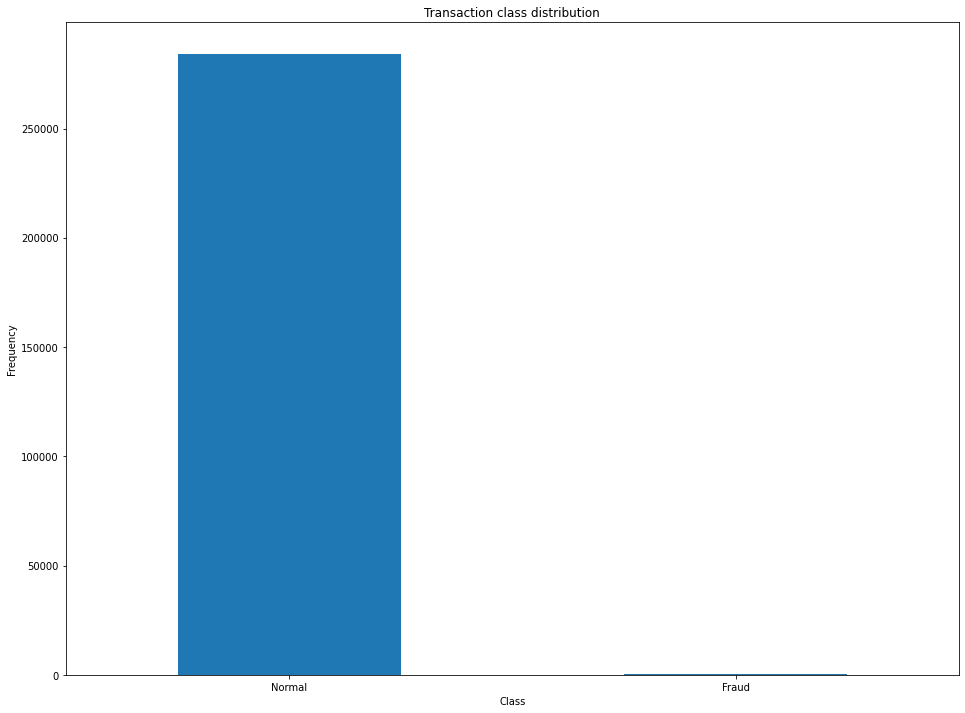

In [28]:
# EDA

count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind= 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [29]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape , normal.shape)

(492, 31) (284315, 31)


In [30]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

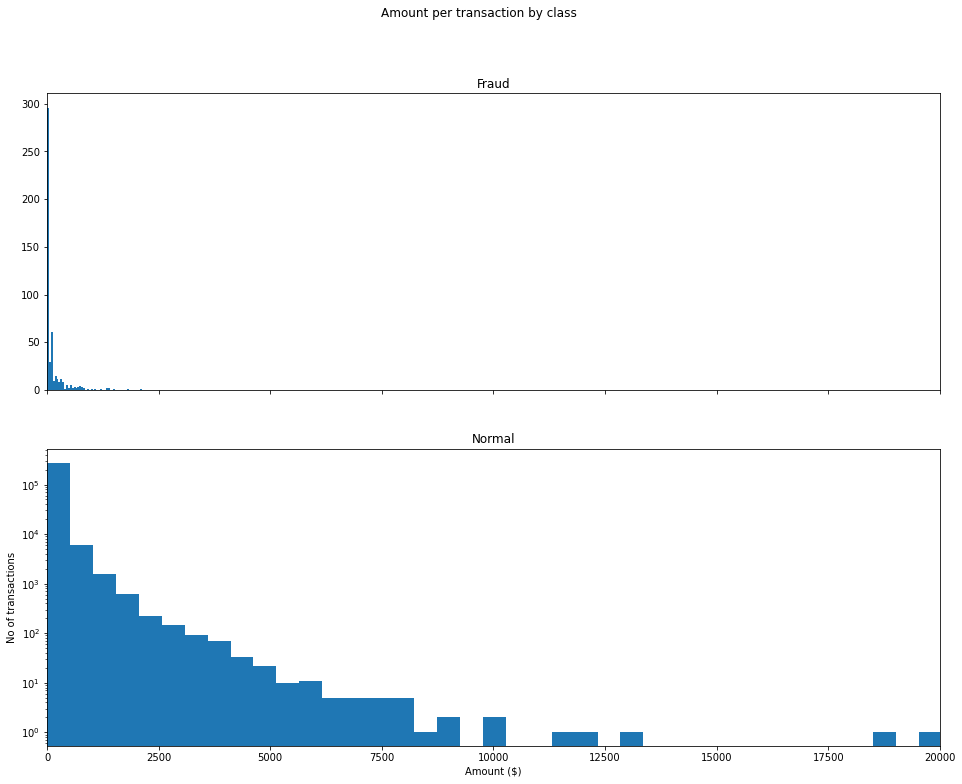

In [32]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins= bins)
ax1.set_title("Fraud")

ax2.hist(normal.Amount, bins= bins)
ax2.set_title("Normal")

plt.xlabel('Amount ($)')
plt.ylabel('No of transactions')

plt.xlim(0,20000)
plt.yscale('log')

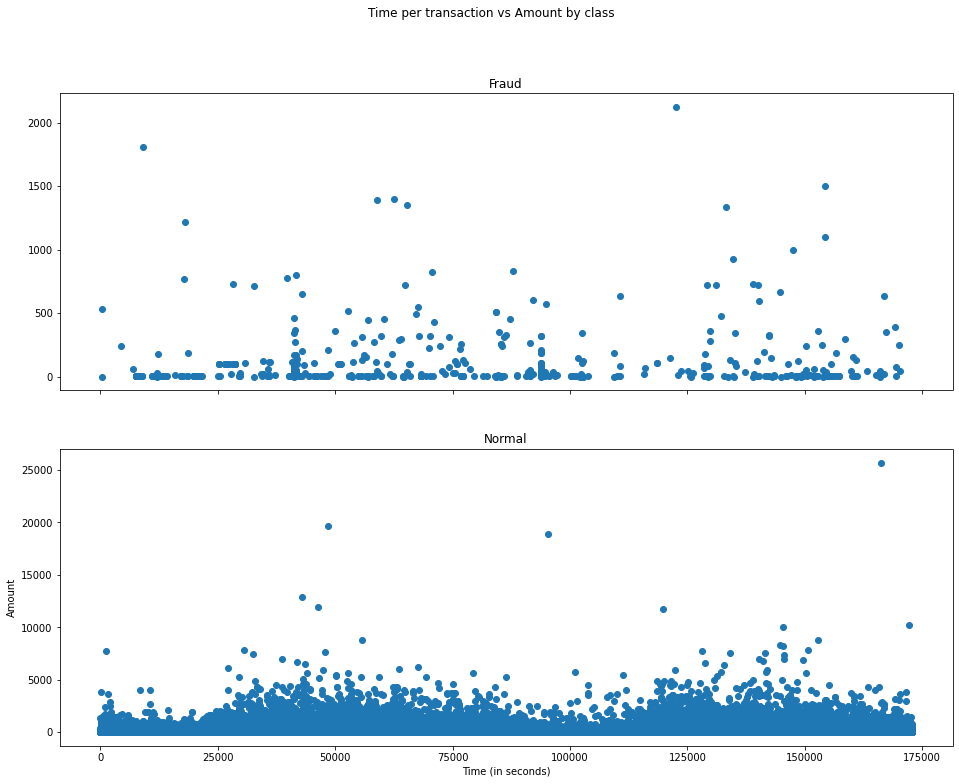

In [33]:
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Time per transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title("Fraud")

ax2.scatter(normal.Time, normal.Amount )
ax2.set_title("Normal")

plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')

plt.show()


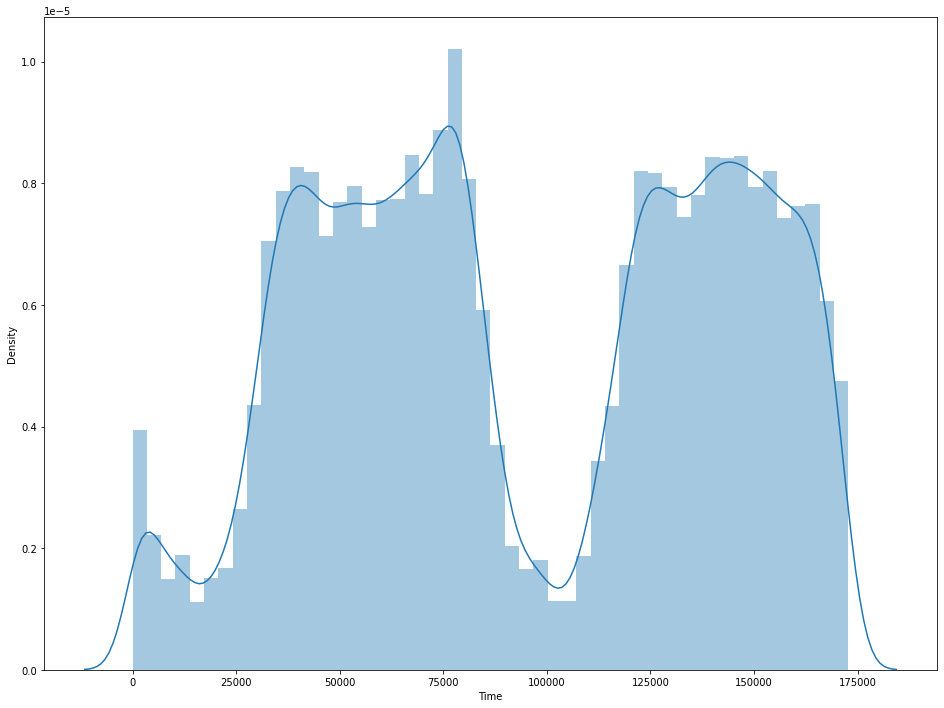

In [34]:
sns.distplot(data['Time'])

In [35]:
len(data)

284807

In [36]:
# taking 10% data only for building the model
# you have to do it by your own with the same method however take 100% data
# taking 100% data here 

In [37]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
fraud = data[data['Class']==1]
valid = data[data['Class']==0]


In [39]:
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


In [40]:
outlier_fraction = len(fraud)/float(len(valid))

In [41]:
outlier_fraction

0.0017304750013189597

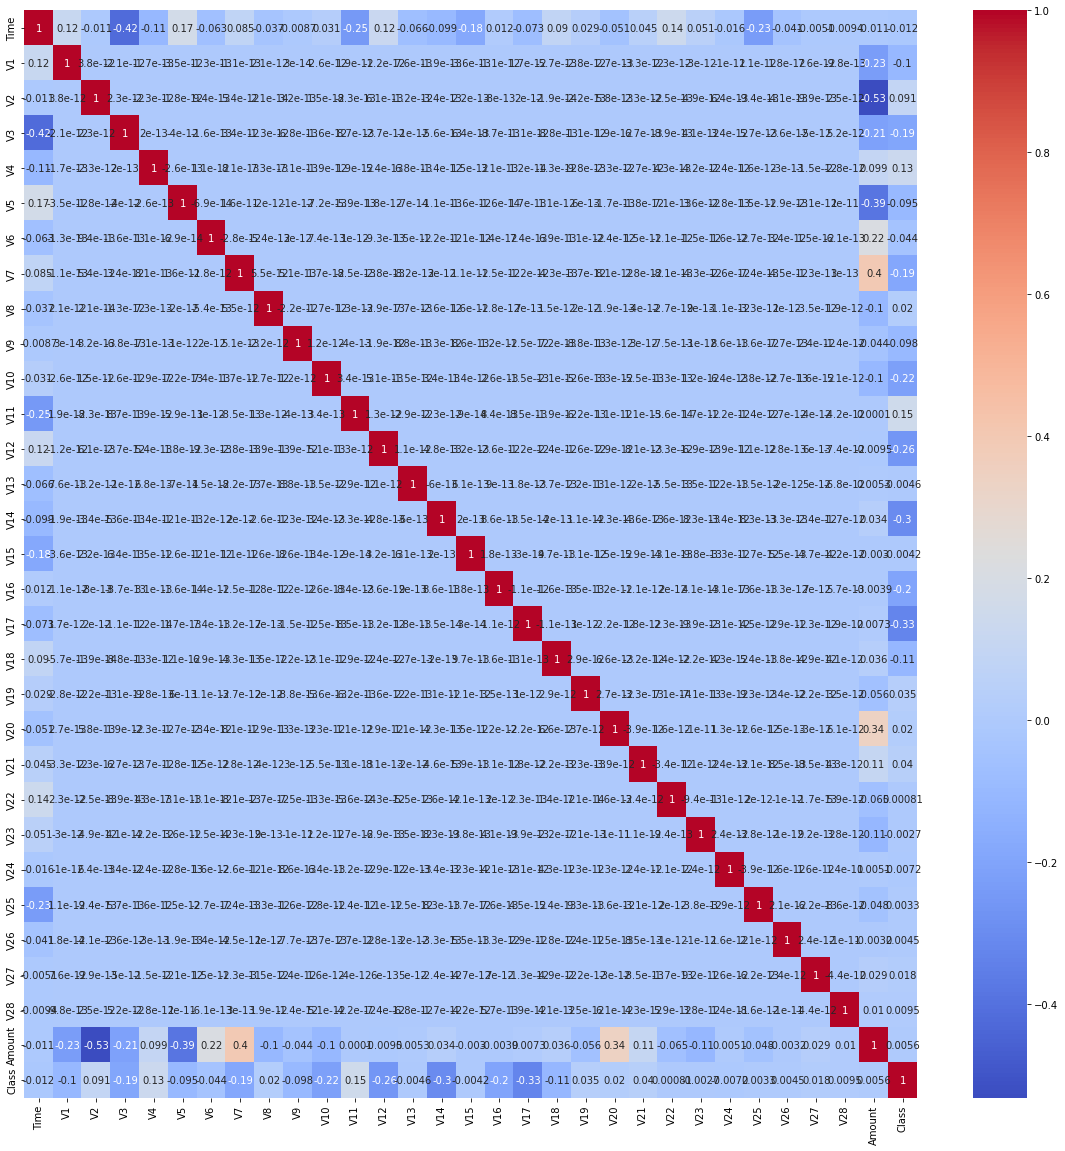

In [42]:
# correlation part
# heat map 
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='coolwarm')

In [43]:
columns = data.columns.tolist()
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [44]:
# split the data into target variable and feature variables

columns = [c for c in columns if c not in ['Class']]
target = 'Class'

In [45]:
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [46]:
target

'Class'

In [47]:
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
state = np.random.RandomState(101)
x = data[columns]
y = data[target]
x_outlier = state.uniform(low=0, high=1 , size=(x.shape[0], x.shape[1]))
print(x.shape)
print(y.shape)


(284807, 30)
(284807,)


In [48]:
# split train and test data for building the model and prediction

from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=110)


In [49]:
x_train.shape
x_test.shape

(85443, 30)

In [50]:
# logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [52]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [54]:
print(classification_report(y_train, y_pred_train))

print("#####"*50)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       0.67      0.69      0.68       352

    accuracy                           1.00    199364
   macro avg       0.84      0.84      0.84    199364
weighted avg       1.00      1.00      1.00    199364

##########################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.66      0.64      0.65       140

    accuracy                           1.00     85443
   macro avg       0.83      0.82      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [55]:
print(confusion_matrix(y_train, y_pred_train))

print("#####"*50)

print(confusion_matrix(y_test, y_pred_test))

[[198895    117]
 [   110    242]]
##########################################################################################################################################################################################################################################################
[[85256    47]
 [   50    90]]


In [56]:
print(accuracy_score(y_train, y_pred_train))

print("#####"*50)

print(accuracy_score(y_test, y_pred_test))

0.9988613791858109
##########################################################################################################################################################################################################################################################
0.9988647402361809


In [57]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [59]:
print(accuracy_score(y_train, y_pred_dt_train))

print("#####"*50)

print(accuracy_score(y_test, y_pred_dt_test))

1.0
##########################################################################################################################################################################################################################################################
0.9993211848834895


In [60]:
from sklearn import tree

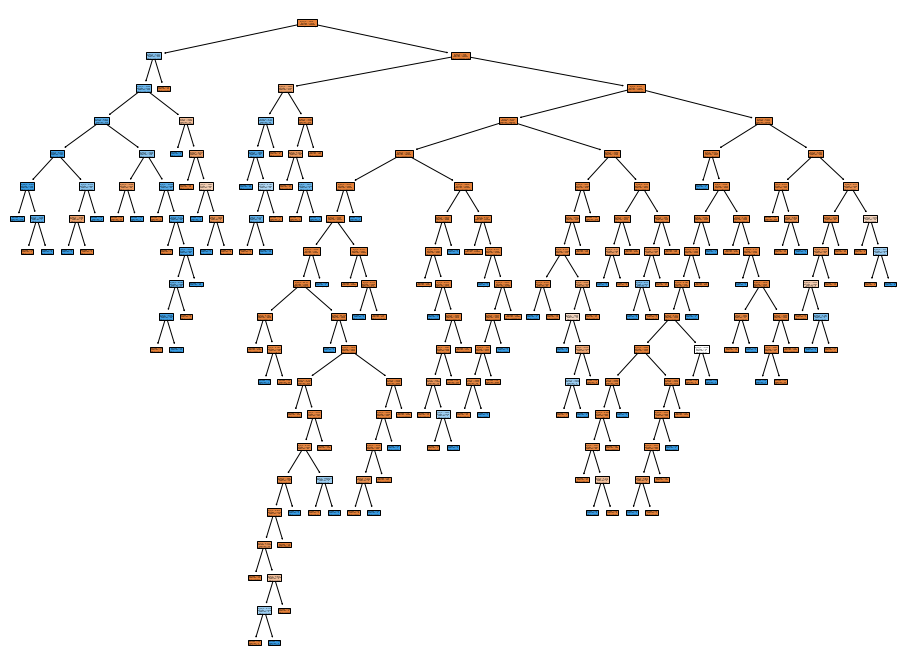

In [61]:
tree.plot_tree(dtree, filled=True)
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:

rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(x_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_rfc_train))

print("#####"*50)

print(accuracy_score(y_test, y_pred_rfc_test))

In [ ]:
print(classification_report(y_train, y_pred_rfc_train))

print("#####"*50)

print(classification_report(y_test, y_pred_rfc_test))

In [ ]:
# XG Boost

In [64]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier()

In [66]:
y_pred_xgb_train = xgb_classifier.predict(x_train)
y_pred_xgb_test = xgb_classifier.predict(x_test)

In [67]:
print(accuracy_score(y_train, y_pred_xgb_train))

print("#####"*50)

print(accuracy_score(y_test, y_pred_xgb_test))

0.9996689472522622
##########################################################################################################################################################################################################################################################
0.9995552590615966


In [68]:
print(classification_report(y_train, y_pred_xgb_train))

print("#####"*50)

print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       0.97      0.84      0.90       352

    accuracy                           1.00    199364
   macro avg       0.98      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364

##########################################################################################################################################################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.96      0.76      0.85       140

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [69]:
# stacking classifier
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import six
import sys


In [71]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [72]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
#from sklearn.externals import six
from mlxtend.classifier import StackingClassifier

In [74]:
from sklearn.model_selection import cross_val_score

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=clf4)

print('3-fold cross validation : \n')

for clf, label in zip([clf1, clf2, clf3,sclf], ['KNN','Naive Bayes Theorem', 'Random Forest',
                                               'Stacking Classifier']):
    scores = cross_val_score(clf, x, y, cv=3, scoring = 'accuracy')
    print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(), scores.std(), label))

3-fold cross validation : 

Accuracy : 0.49 (+/-0.40)[KNN]
Accuracy : 0.99 (+/-0.00)[Naive Bayes Theorem]


KeyboardInterrupt: ignored

In [ ]:
# IsolationForest, LocalOutlierFactor

from sklearn.ensemble import IsolationForest

from sklearn.neighbors import LocalOutlierFactor

from sklearn.svm import OneClassSVM

In [ ]:
LocalOutlierFactor()

In [ ]:
Classification = {"Isolation Forest" : IsolationForest(n_estimators=100,max_samples=len(x),
                                                   contamination =outlier_faction),
                                                       
                                                       
                "Local Outlier Factor" : LocalOutlierFactor(n_neighbors=20, 
                                                            contamination=outlier_faction),
                 
                 "One Class SVM" : OneClassSVM()}

In [ ]:
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(x)
        score_prediction = clf.negative_outlier_factor_
    elif clf_name =="One Class SVM" :
        clf.fit(x)
        y_pred = clf.predict(x)
        
    else:
        clf.fit(x)
        score_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
        
    y_pred[y_pred==1]= 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=y).sum()
    
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(y, y_pred))
    print("Classification Report :")
    print(classification_report(y, y_pred))